In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time
import itertools

from importlib import reload

import gen_exp
import utils as ut

In [2]:
np.random.seed(42)

In [3]:
# matplotlib parameters for figures
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rcParams.update({'font.size': 10, 'font.serif' : ['Bookman']})

# 1. Binary classification 
Let $(X,Y)$ be a tuple of random variables on $\mathcal{X} \times \mathcal{Y}$ with  $\mathcal{Y} = \left \{ -1, +1\right \}$ that follow a probability law $\mathbb{P}_{X,Y}$. The **Bayes optimal scorer** is defined as $ \eta : x \mapsto \mathbb{P} \left (Y=+1 \; | \; X=x \right )$. Define $\mathbb{P}_X$ as the marginal law of the variable $X$ and $f$ the density associated to this law. Then the tuple $(f,\eta)$ completely determines our density $\mathbb{P}_{X,Y}$.

In binary classification, the loss of a classifier $g$ is defined as $\mathcal{L} (g) := \mathbb{P}\left ( g(X) \ne Y \right ) $.
The best classifier according to this loss is $g^*: x \mapsto  2 \mathbb{I}_{\eta(x) > 1/2 }-1$. It is called the **Bayes classifier**.
Given $n$ i.i.d. realizations $(x_i,y_i)_{i=1}^n$ of $(X,Y)$ we learn a classifier $\hat{g}$ that minimize the empirical loss $\widehat{\mathcal{L}} (g) := \sum_{i=1}^n \mathbb{I} \left \{ g(X_i) \ne Y_i \right \}$ on a function class $\mathcal{G}$. The **generalization error** is defined as $R(\hat{g})$ where $R(g) = \mathcal{L}(g ) - \mathcal{L}(g^*) \ge 0$ is the **regret**.  

Let $\alpha \in [0,1)$, we introduce the **Mammen-Tsybakov condition**:
$$
\begin{align}
\exists B > 0, \; \forall t \ge 0, \; \mathbb{P} \left ( |2  \eta (X) - 1 | \le t  \right )  \le B t^{\frac{\alpha}{1-\alpha}}.
\end{align}
$$
In the general case, the generalization error can be show to be of order $n^{-1/2}$ with great probability.
Under this condition, the generalization error can be shown to be of the order $n^{\frac{-1}{2-\alpha}}$ with great probability.


We assume that $\mathcal{X} = [0,1]$ and that $f = 1$ and finally that $\eta$ is increasing. Then
$$
\begin{align}
\mathbb{P} \left ( |2  \eta (X) - 1 | \le t  \right ) &= \mathbb{P} \left ( (1-t)/2 \le \eta (X) \le (1+t)/2  \right )\\
 &=
\int_\mathcal{X} \mathbb{I} \left \{ (1-t)/2 \le \eta(x) \le (1+t)/2  \right \} dx \\
&= \eta^{-1} \left ( [1+t]/2\right)  - \eta^{-1} \left( [1-t]/2\right ) \\
&\approx t \left(\eta^{-1}  \right )' \left ( 1/2\right) + 
\frac{t^3}{12} \left(\eta^{-1}  \right )^{(3)} \left ( 1/2\right)  + o_0(t^3) \\
\end{align}
$$
The last equality is only useful close to zero and true if $\eta^{-1}$ is sufficiently regular.

This decomposition basically shows that to have fast generalization speeds, one needs to choose smartly the derivative of $\eta$ close to $1/2$.

Introducing
* $\eta_a(x) = 
\begin{cases}
 \frac{1}{2}  + \frac{1}{2} \left ( 2x - 1 \right )^{\frac{1-a}{a}} \quad & \text{if } x \in [1/2,1], \\
 \frac{1}{2}  - \frac{1}{2} \left ( 1 - 2x \right )^{\frac{1-a}{a}} \quad & \text{otherwise.} 
\end{cases}$

then

* $\eta_a^{-1}(x) = 
\begin{cases}
 \frac{1}{2}  + \frac{1}{2} \left ( 2x - 1 \right )^{\frac{a}{1-a}} \quad & \text{if } x \in [1/2,1], \\
 \frac{1}{2}  - \frac{1}{2} \left ( 1 - 2x \right )^{\frac{a}{1-a}} \quad & \text{otherwise.} 
\end{cases}$

and we have that 
* $\mathbb{P} \left ( |2  \eta_a (X) - 1 | \le t  \right ) = t^{\frac{a}{1-a}}.$

which shows that $(1.,\eta_a)$ determines our distribution, then the Mammen-Tsybakov condition is verified.

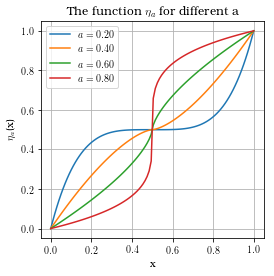

In [4]:
a_collection = np.linspace(0.,1.,6)[1:-1]
ut.plot_eta(a_collection, gen_exp.eta_a)

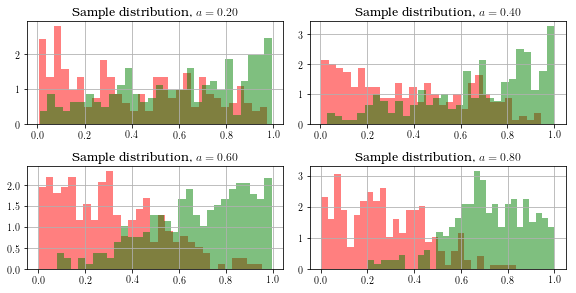

In [5]:
ut.plot_distribution(a_collection, gen_exp.datagen_eta_a)

We define $g_a^*$ as the classifier based on $\eta_a$, i.e. $g_a^*(x) = I_{\eta_a(x) > 1/2}$, then, with $L_a$ the risk computed when the data is generated with $\eta = \eta_a$,
$$
\begin{align*}
L_a(g_a) &=\frac{1-a}{2}  \\
\end{align*}
$$

Since our data is 1-dimensional, we assume that we learn a frontier $f$, such that if a data point $x \in \mathbb{R}$ verifies $x>f$ it is positive and negative otherwise. 
The classifier $g_{f}$ is defined this way, then:
$$
\begin{align*}
L_a(g_{f})  &= L_a(g_a) + \frac{a}{2} |2f-1 |^{a^{-1}}.
\end{align*}
$$

In [6]:
n_list = [ int(np.power(2,i)) for i in range(6,10)]

In [7]:
df_classif = gen_exp.classification_experiments(n_list, a_collection, n_exps=1000, verbose=True)

Done   0 %
Done   5 %
Done  10 %
Done  15 %
Done  20 %
Done  25 %
Done  30 %
Done  35 %
Done  40 %
Done  45 %
Done  50 %
Done  55 %
Done  60 %
Done  65 %
Done  70 %
Done  75 %
Done  80 %
Done  85 %
Done  90 %
Done  95 %


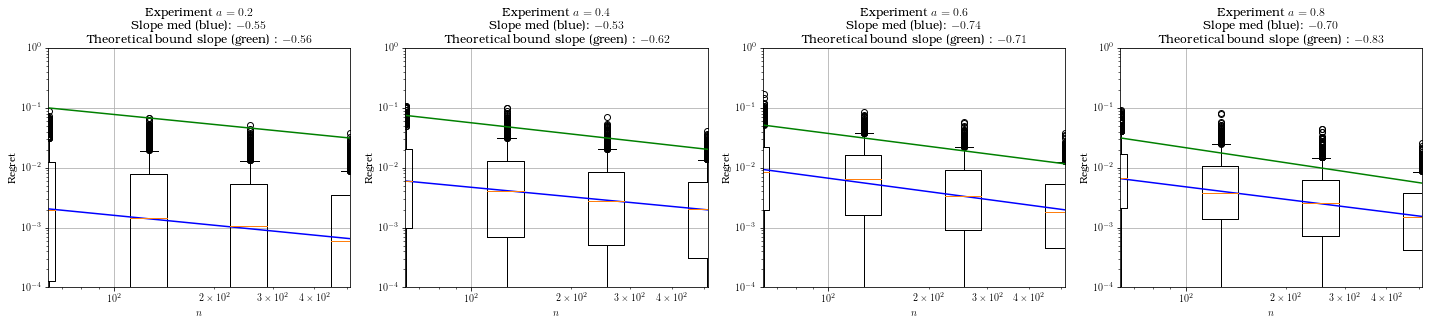

In [8]:
ut.boxplot_slopes(df_classif)

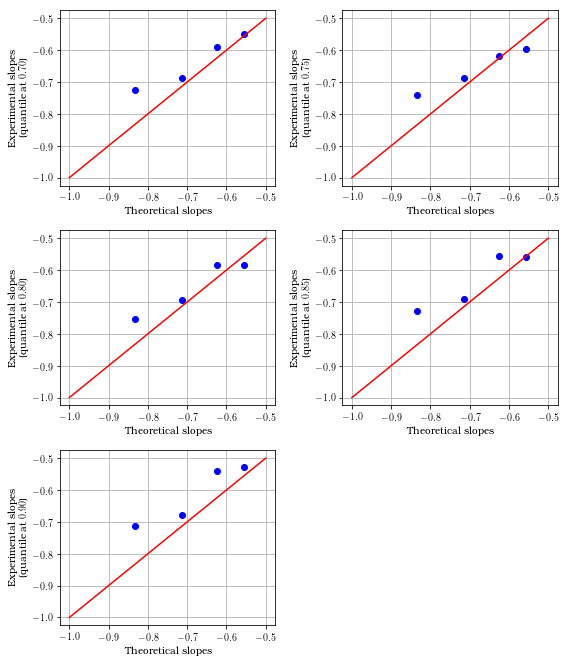

In [9]:
ut.slopes_quants(df_classif)

In [10]:
df_classif.to_csv("results_classif.csv", index = False)

The value of the experiment slope is obtained from regression on quantiles obtained with 1000 experiences. 
These points are not random and show that by designing a function that satisfies the Mammen-Tsybakov function, we confirm the theoretical results.

# 2. Pointwise ROC optimization in bipartite ranking

**It is advised to have read and understood section 5.2 of:** * * 

Clémençon, S. & Vayatis, N.*Overlaying classifiers: a practical approach for optimal ranking.*
Constructive Approximation, Advances in Neural Information Processing Systems 21.

** before reading this section. **

Bipartite ranking seeks to learn a score function that orders observations from the most likely to the least likely to be positive. An optimal solution is to take the order induced by the Bayes optimal scorer $\eta$.

Pointwise ROC optimization consists in findind a set $R$ such that
$$
\sup_{R \in \mathcal{R}} G(R) \qquad \text{subject to}\qquad H (R) \le \alpha + \phi,
$$
where $G(R) = \mathbb{P} (X \in R | Y=+1)$ and $H(R) = \mathbb{P} (X \in R | Y=-1)$.

Let $G_n$, $H_n$ be the empirical counterparts of $G$, $H$.
The purpose of this section will be to study the generalization error associated to the following problem, where $\phi$ is a tolerance parameter:
$$
\sup_{R \in \mathcal{R}} \hat{G}_n(R) \qquad \text{subject to}\qquad \hat{H}_n (R) \le \alpha + \phi.
$$

The noise condition in this case is that there exist constants $a \in (0,1)$ and $D > 0$ such that $\forall t \ge 0 $,
$$
\mathbb{P} \left \{ | \eta(X) - Q^*(\alpha) | \le t  \right \} \le D \cdot t^{\frac{a}{1-a}},
$$
where $Q^*(\alpha) = \bar{H}^{*-1}(\alpha)$ with $H^*(t) = \mathbb{P} \{ \eta(X) < t \mid Y = -1\}$.

Bayes' formula gives us that:
$$
\bar{H}^*(t) = \frac{1}{1-p} \int_{1-t > 1 - \eta(x)} (1-\eta(x)) f(x) dx.
$$

For $\alpha$ fixed, we wish to find a collection of $\eta$'s such that $\bar{H}^*(1/2) = \alpha$, and that are equal to the $\eta_a$'s of section 1 around $x=1/2$. 

This collection will enable us to illustrate the fast speeds for pointwise ROC optimization. 
The condition $\bar{H}^*(1/2) = \alpha$ is equivalent to:
$$
\frac{\int_{\eta(x)>0.5} (1-\eta(x)) dx}{\int (1-\eta(x)) dx} = \alpha.
$$

Introducing, with $C<0.5, m< 0.5$
* $\eta_{a,C,m}(x) = 
\begin{cases}
C  \quad & \text{if } x \in [0,l], \\
 \frac{1}{2}  - \frac{1}{2} \left ( 1 - 2x \right )^{\frac{1-a}{a}} \quad & \text{if } x \in ]m,0.5], \\
 \frac{1}{2}  + \frac{1}{2} \left ( 2x - 1 \right )^{\frac{1-a}{a}} \quad & \text{if } x \in [0.5,1-m[, \\
1-C  \quad & \text{if } x \in [1-m,1]. \\
\end{cases}$

We have that for $t$ small enough, $\mathbb{P} \left ( |2 \eta_{a,C,m} (X) - 1 | \le t  \right ) = t^{\frac{a}{1-a}}$
and thus the noise condition is satisfied with parameter $a$.


With this family of $\eta$'s the condition $\bar{H}^*(1/2) = \alpha$ becomes:
$$
\frac{1}{2}+ m(1-2C)  + \frac{a (1-2m)^{a^{-1}}}{2} = 1-\alpha.
$$
We fix $m$ and $\alpha$ and solve in $C$,
$$
C = \frac{1}{2} + \frac{2\alpha-1}{4m} + \frac{a(1-2m)^{a^{-1}}}{4m} .
$$

There are conditions on the possibles values of $\alpha$ imposed by the restrictions on the value $C$
$$
C<1/2 \Leftrightarrow \alpha < \frac{1}{2} - \frac{a}{2} (1-2m)^{a^{-1}},
$$
$$
C>0 \Leftrightarrow  \alpha > \frac{1}{2} - m - \frac{a}{2} (1-2m)^{a^{-1}}.
$$

If we wish for $\eta$ to be increasing, we need to have that $C < \frac{1}{2} - \frac{1}{2} (1-2m)^{\frac{1-a}{a}}$,
but it is not very important in practice.

In [11]:
alpha = 0.18
a = 0.80
m = 0.35

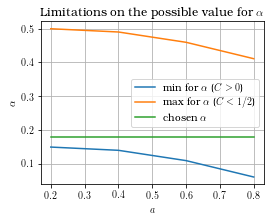

In [12]:
ut.plot_possible_alpha_values(gen_exp.bipart_interval_alpha, a_collection, alpha=alpha, m=m)

In [13]:
C = gen_exp.bipart_C(a, alpha, m=m)

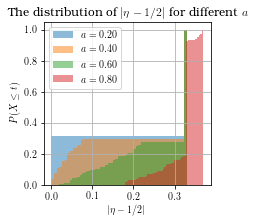

In [14]:
gendatafun = lambda n,a : gen_exp.datagen_eta_aCm(n, a, C, m)
etafun = lambda x,a : gen_exp.eta_aCm(x, a, C, m)
ut.plot_emp_mammen(gendatafun, etafun, a_collection, n_obs = 200)

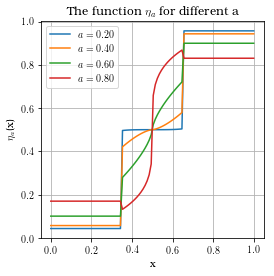

In [15]:
eta_fun = lambda x,a : gen_exp.eta_aCm(x, a, gen_exp.bipart_C(a, alpha,m), m)
ut.plot_eta(a_collection, eta_fun)

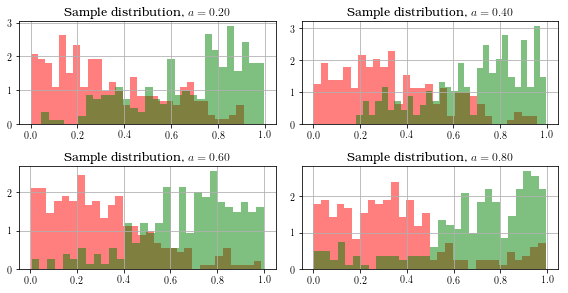

In [16]:
gen_datafun = lambda n,a : gen_exp.datagen_eta_aCm(n, a, C=gen_exp.bipart_C(a, alpha, m=m))
ut.plot_distribution(a_collection, gen_datafun)

We need to know the primitive of $\eta_{a,C,m}$ to compute $G$ and $H$ on the region defined by our frontier.

To compute the integral of $\eta_{a,C,m}$ we fist compute the integral of $\eta_{a}$:
$$
\int_0^f \eta_a(x) dx = \frac{2f-a}{4} + \frac{a|2f-1|^{a^{-1}}}{4}.
$$


In [17]:
n_list = [ int(np.power(2.,i)) for i in range(6,10)] 

In [18]:
n_exps = 1000

In [19]:
n_list, a_collection, alpha, m, n_exps

([64, 128, 256, 512], array([ 0.2,  0.4,  0.6,  0.8]), 0.18, 0.35, 1000)

In [20]:
df_bipart = gen_exp.exp_bi_ranking(n_list, n_exps, a_collection, alpha=alpha, m=m)

Done   0 %
Done   5 %
Done  10 %
Done  15 %
Done  20 %
Done  25 %
Done  30 %
Done  35 %
Done  40 %
Done  45 %
Done  50 %
Done  55 %
Done  60 %
Done  65 %
Done  70 %
Done  75 %
Done  80 %
Done  85 %
Done  90 %
Done  95 %


In [21]:
df_bipart

,GR,GRn,HR,HRn,a,frontier,gen_error,n,phi_nd
0,0.82,0.895621,0.18,0.255637,0.2,0.424371,-0.075621,64,0.037818
1,0.82,0.927366,0.18,0.287458,0.2,0.392588,-0.107366,128,0.053729
2,0.82,0.877865,0.18,0.237869,0.2,0.442133,-0.057865,256,0.028935
3,0.82,0.889597,0.18,0.249607,0.2,0.430398,-0.069597,512,0.034804
4,0.82,0.820385,0.18,0.180385,0.4,0.499615,-0.000385,64,0.000192
5,0.82,0.822048,0.18,0.182049,0.4,0.497952,-0.002048,128,0.001024
6,0.82,0.855188,0.18,0.215724,0.4,0.464544,-0.035188,256,0.017862
7,0.82,0.794611,0.18,0.154841,0.4,0.525274,0.025389,512,-0.012580
8,0.82,0.792247,0.18,0.156491,0.6,0.525631,0.027753,64,-0.011754
9,0.82,0.881210,0.18,0.265772,0.6,0.426509,-0.061210,128,0.042886


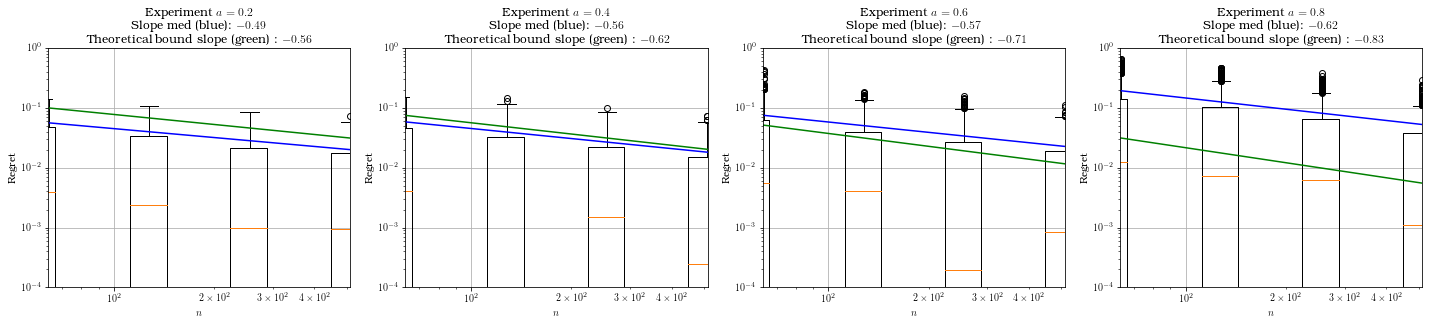

In [22]:
ut.boxplot_slopes(df_bipart, quant=0.8)

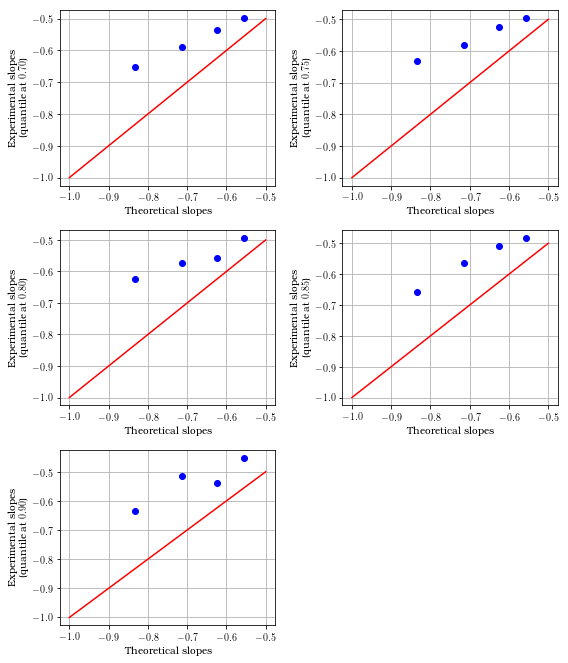

In [23]:
ut.slopes_quants(df_bipart)

In [24]:
df_bipart.to_csv("results_bipart.csv", index = False)

# 3. Pointwise ROC optimization in similarity ranking

**It is advised to have read and understood:** * * 

Vogel, R.; Bellet, A. & Clémençon, S.
*A Probabilistic Theory of Supervised Similarity Learning for Pointwise ROC Curve Optimization.*
Proceedings of the 35th International Conference on Machine Learning, PMLR, 2018, 80, 5062-5071 

** before reading this section. **

In a two classes setting, assume that we have two classes ${-1, +1}$ of equal probability and $X \in [0,1]$ such that $X \sim \mathcal{U} ([0,1])$. 

Then if $g$ and $f$ are respectively the densities of $X|Y=+1$ and $X | Y=-1$, we have that $1 = \frac{1}{2}g + \frac{1}{2}f$.


We introduce the following density $g_{a,C,m}$ for the first class, with $C<0.5, m< 0.5$
$$ 
\frac{1}{2}g (x) = \frac{1}{2} g_{a,C,m}(x) = 
\begin{cases}
C  \quad & \text{if } x \in [0,m], \\
 \frac{1}{2}  - \frac{1}{2} \left ( 1 - 2x \right )^{\frac{1-a}{a}} \quad & \text{if } x \in ]m,0.5], \\
 \frac{1}{2}  + \frac{1}{2} \left ( 2x - 1 \right )^{\frac{1-a}{a}} \quad & \text{if } x \in [0.5,1-m[, \\
1-C  \quad & \text{if } x \in [1-m,1]. \\
\end{cases}
$$


Our optimal similarity function satisfies:
$$
\eta(x,x') = \eta_{a,C,m}(x,x') = \frac{1}{4}g(x)g(x') + \frac{1}{4}(2-g(x))(2-g(x')) 
= \frac{1}{2} + \frac{1}{2} \left ( g(x) - 1 \right )\left( g(x') - 1 \right ),
$$

where

$$ 
g (x) - 1 =  
\begin{cases}
2C - 1 \quad & \text{if } x \in [0,m], \\
 \text{sgn}(2x-1)  \left | 2x - 1 \right |^{\frac{1-a}{a}} \quad & \text{if } x \in ]m,1-m], \\
1-2C  \quad & \text{if } x \in [1-m,1]. \\
\end{cases}
$$

As before, we wish to have $Q^*(\alpha)=1/2$. When $t$ is small enough,

$$
\begin{align}
\mathbb{P} \left( |\eta(x,x') - Q^*(\alpha)| \le t \right) 
&= \mathbb{P} \left( |\eta(x,x')-1/2|  \le  t \right), \\
&= 2 (4t)^{\frac{a}{1-a}} \left [ 1 - \log(2) -  \frac{a}{1-a} \log \left ( 4t \right ) \right ],\\
\end{align}
$$
which satisfies our noise condition. Indeed, if $t$ is small enough, we have something of order $t^{\frac{a}{1-a}} \log(t)$.

It is necessary to have once again that:
$$
\int_{\eta(x, x')>0.5} \eta(x, x') dx= \frac{1-\alpha}{2}.
$$

We note by 
* $A_1$ the value of the integral of $\eta(x,x')$ restricted to $[1-m,1]\times [1-m,1]$,
* $A_2$ the value of the integral of $\eta(x,x')$ restricted to $[1-m,1]\times [0.5,1-m]$,
* $A_3$ the value of the integral of $\eta(x,x')$ restricted to $[0.5,1-m]\times [0.5,1-m]$,
see drawing below.

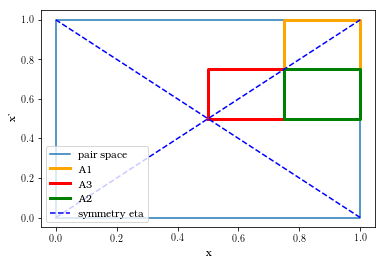

In [25]:
gen_exp.illustrate_As()

Then
$$
\begin{align}
\int_{\eta(x, x')>0.5} \eta(x, x') dx &= 
2 \times A_1 + 4 \times A_2 + 2\times A_3,\\
\int_{\eta(x, x')>0.5} \eta(x, x') dx &\\
= 
2 \times \frac{m^2}{2} & \left ( 1 +  \left(1-2C\right )^2   \right ) + 
4 \times \frac{m}{4} \left [ (1-2m) + a(1-2C)(1-2m)^{a^{-1}}  \right ]  + 
2 \times  \frac{1}{8} \left[ \left(1 -2m \right)^2 + a^2 \left ( 1-2m \right )^{2a^{-1}} \right].\\
\end{align}
$$

We solve the following equation in $C$
$$
2A_1 + 4A_2 + 2A_3 =  \frac{1-\alpha}{2},\\
$$
with a symbolic calculus software and obtain 
$$
C = \frac{1}{2}- \frac{\sqrt{1-2\alpha}}{4m} + \frac{a(1-2m)^{a^{-1}}}{4m} .
$$

The interval in which $\alpha$ is supposed to be to satisfy $C \ge 0$ (lhs constraint) and $C \le 1/2$ (rhs constraint) is
$$
\left [\frac{1}{2} - \frac{ \left (2m + a(1-2m)^{a^{-1}} \right )^2}{2} ; 
\frac{1}{2} - \frac{  a^2(1-2m)^{2a^{-1}}}{ 8m^2} \right]
$$

In [26]:
alpha = 0.26
m = 0.35
a_collection = np.linspace(0.1,0.9,9)

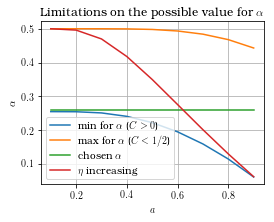

In [27]:
ut.plot_possible_alpha_values(gen_exp.simrank_interval_alpha, a_collection, alpha=alpha, m=m, sup_inc_simrank=True)

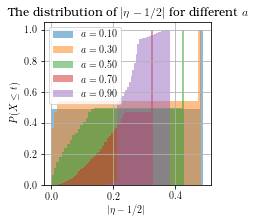

In [28]:
gendata_fun_of_a = lambda n,a : gen_exp.datagen_eta_aCm(n, a, C=gen_exp.simrank_C(a,alpha,m), m=m)
eta_fun_of_a = lambda x, xp, a : gen_exp.simrank_eta(x, xp, a, alpha=alpha, m=m)
ut.plot_emp_mammen(gendata_fun_of_a, eta_fun_of_a, [ a for i,a in enumerate(a_collection) if i%2 == 0 ], simrank=True)

In [29]:
n_list = [ int(np.power(2.,i)) for i in range(6,10)] # 11
a_collection = np.linspace(0.1,0.9,9)
m = 0.36
n_exps = 1000
m, alpha, n_list, a_collection, len(n_list)*len(a_collection)*n_exps

(0.36,
 0.26,
 [64, 128, 256, 512],
 array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9]),
 36000)

In [31]:
# df_simrank = gen_exp.exp_sim_ranking(n_list, n_exps, a_collection, m=m, alpha=alpha)
# Very long since we use complete estimators, should be ran on a powerful machine.
# You can run the script gen_exp.py and load the results from there.



df_simrank = pd.read_csv("results_simrank.csv")

In [32]:
sel_as = [ a for i,a in enumerate(df_simrank["a"].unique()) if i % 3 == 0 ]

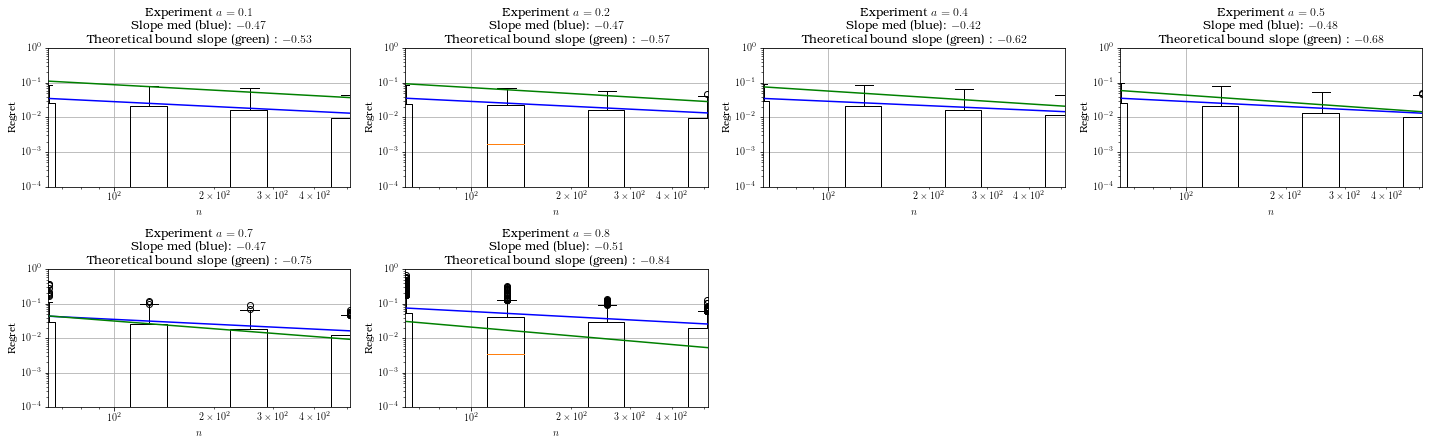

In [33]:
ut.boxplot_slopes(df_simrank[[ a in sel_as for a in df_simrank["a"]]], quant=0.8)

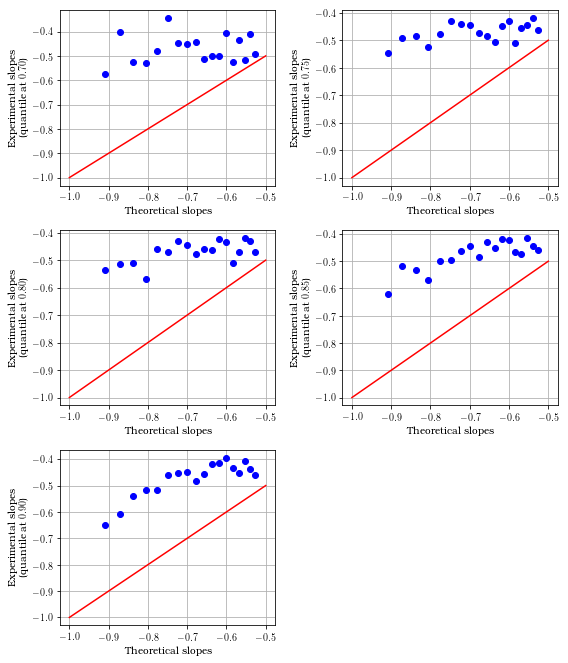

In [34]:
ut.slopes_quants(df_simrank)